In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statistics
train_df=pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')
train_df





,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
import re
import warnings
warnings.filterwarnings('ignore')

In [ ]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
train_df.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [ ]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
train_df['Age'].dtype

dtype('float64')

<Axes: xlabel='Age', ylabel='Density'>

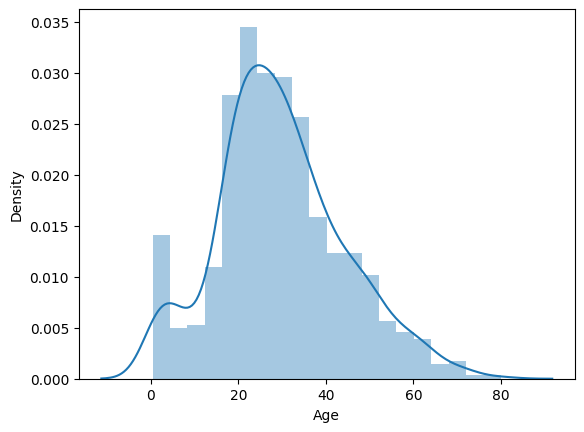

In [ ]:
sns.distplot(train_df['Age'])

In [ ]:
# prompt: count of duplicates in Cabin column

train_df['Cabin'].duplicated().sum()

743

In [ ]:
train_df['Cabin'].dtype

dtype('O')

In [ ]:
train_df['Cabin'].fillna(train_df['Cabin'].mode()[0],inplace=True)

In [ ]:
train_df['Embarked'].dtype

dtype('O')

In [ ]:
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0],inplace=True)

In [ ]:
train_df['Cabin'].duplicated().sum()


744

In [ ]:
# prompt: make sibsp,parch into single feature
train_df['FamilySize']=train_df['SibSp']+train_df['Parch']+1


In [ ]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,B96 B98,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,B96 B98,S,4
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1


In [ ]:
train_df.drop('Ticket',axis=1,inplace=True)

In [ ]:
def detect_outliers(data, column):
    """
    Detects outliers in a numeric column using the IQR method.

    Parameters:
    - data: Pandas DataFrame
    - column: Name of the numeric column in which outliers are to be detected

    Returns:
    - List of indices corresponding to the outliers
    """
    # Select the specified column
    values = data[column]

    # Calculate the IQR (Interquartile Range)
    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find indices of outliers
    outliers = (values < lower_bound) | (values > upper_bound)

    # Return the indices of outliers
    return outliers.index[outliers].tolist()


In [ ]:
detect_outliers(train_df,'Age')

[33, 54, 96, 116, 280, 456, 493, 630, 672, 745, 851]

In [ ]:
def count_outliers(data, column):
    """
    Counts the number of outliers in a numeric column using the IQR method.

    Parameters:
    - data: Pandas DataFrame
    - column: Name of the numeric column in which outliers are to be counted

    Returns:
    - Count of outliers
    """
    # Select the specified column
    values = data[column]

    # Calculate the IQR (Interquartile Range)
    Q1 = values.quantile(0.25)
    Q3 = values.quantile(0.75)
    IQR = Q3 - Q1

    # Define the lower and upper bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Count the number of outliers
    count_outliers = ((values < lower_bound) | (values > upper_bound)).sum()

    # Return the count of outliers
    return count_outliers

# Example usage:
outliers_count = count_outliers(train_df, 'Fare')
print("Number of outliers in Fare:", outliers_count)


Number of outliers in Fare: 116


In [ ]:
train_df['Age'].max()

80.0

In [ ]:
train_df['Age'].skew()

0.38910778230082704

In [ ]:
#for normal distribution skew should be -1 to +1
import re
import warnings
warnings.filterwarnings('ignore')


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Titanic-Dataset.csv')

In [ ]:
train_df['Age'] = df['Age'].copy()


<Axes: xlabel='Pclass', ylabel='Age'>

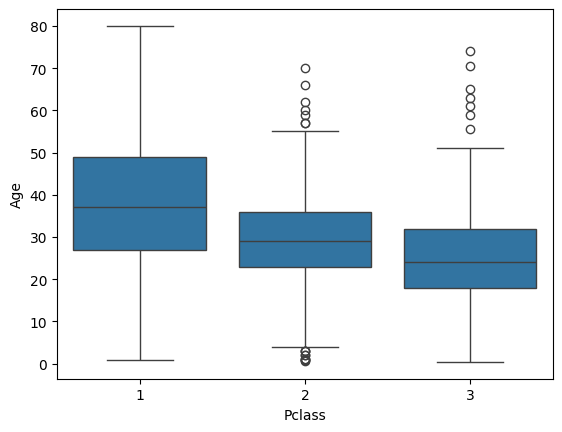

In [ ]:
sns.boxplot(x='Pclass',y='Age',data=train_df)

In [ ]:
# Calculate the median age for each Pclass
median_age_by_pclass = train_df.groupby('Pclass')['Age'].median()

# Define a function to apply the imputation
def impute_age(row):
    return median_age_by_pclass[row['Pclass']] if pd.isnull(row['Age']) else row['Age']

# Apply the imputation to fill missing values in the 'Age' column
train_df['Age'] = train_df.apply(impute_age, axis=1)


In [ ]:
train_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Cabin          0
Embarked       0
FamilySize     0
dtype: int64

<Axes: xlabel='FamilySize', ylabel='count'>

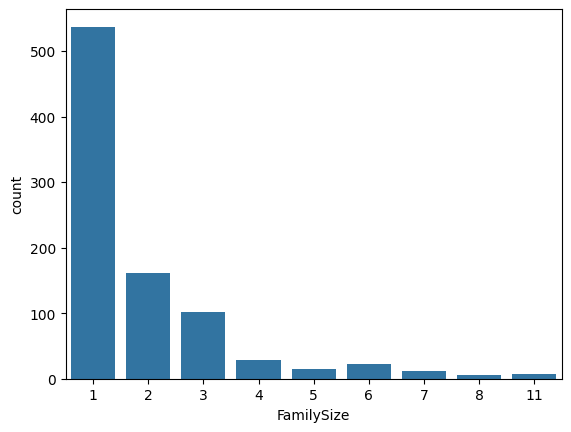

In [ ]:
sns.countplot(x='FamilySize',data=train_df)

In [ ]:
filtered_df = train_df[train_df['FamilySize'] == 10]
filtered_df


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize


<Axes: xlabel='Fare', ylabel='Density'>

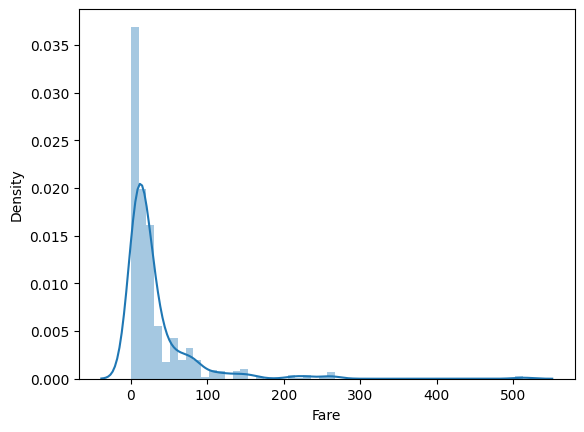

In [ ]:
sns.distplot(train_df['Fare'])

In [ ]:
train_df['Fare'].skew()

4.787316519674893

In [ ]:
import cufflinks as cf
cf.go_offline()


In [ ]:
train_df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
dummy=pd.get_dummies(df['Embarked'])

In [ ]:
dummy = pd.get_dummies(train_df['Embarked'],drop_first=True)

# Concatenate the dummy columns to the original DataFrame
train_df = pd.concat([train_df, dummy], axis=1)

# Display the resulting DataFrame
train_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,FamilySize,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,B96 B98,S,2,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C,2,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,B96 B98,S,1,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S,2,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,B96 B98,S,1,0,1


In [ ]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,FamilySize,Q,S
0,0,3,male,22.0,1,0,7.2500,2,0,1
1,1,1,female,38.0,1,0,71.2833,2,0,0
2,1,3,female,26.0,0,0,7.9250,1,0,1
3,1,1,female,35.0,1,0,53.1000,2,0,1
4,0,3,male,35.0,0,0,8.0500,1,0,1


In [ ]:
# Perform one-hot encoding on the 'Sex' column
train_df = pd.get_dummies(train_df, columns=['Sex'], drop_first=True)

# Now, 'Sex' has been transformed into two binary columns: 'Sex_male' and 'Sex_female'
# 'Sex_male' indicates whether the passenger is male (1) or not (0)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(train_df.drop('Survived', axis=1), train_df['Survived'], test_size=0.25, random_state=42)

# Create a logistic regression model
model = LogisticRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8026905829596412
